In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

Read the csv file

Drop all samples which do not has sii numeric value

In [8]:
df = pd.read_csv("/kaggle/input/child-mind-institute-problematic-internet-use/train.csv", index_col="id")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3960 entries, 00008ff9 to ffef538e
Data columns (total 81 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Enroll_Season               3960 non-null   object 
 1   Basic_Demos-Age                         3960 non-null   int64  
 2   Basic_Demos-Sex                         3960 non-null   int64  
 3   CGAS-Season                             2555 non-null   object 
 4   CGAS-CGAS_Score                         2421 non-null   float64
 5   Physical-Season                         3310 non-null   object 
 6   Physical-BMI                            3022 non-null   float64
 7   Physical-Height                         3027 non-null   float64
 8   Physical-Weight                         3076 non-null   float64
 9   Physical-Waist_Circumference            898 non-null    float64
 10  Physical-Diastolic_BP                   2954 non-null 

In [7]:
df.head(20)

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
id,,,,,,,,,,,,,,,,,,,,,
00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.00,50.8,NaN,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.00,46.0,22.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.50,75.6,NaN,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.00,81.6,NaN,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.50,112.2,NaN,...,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0
0038ba98,Fall,10,0,NaN,NaN,Fall,19.660760,55.00,84.6,NaN,...,4.0,1.0,0.0,20.0,Winter,27.0,40.0,Fall,3.0,0.0
00abe655,Fall,11,0,Summer,66.0,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,10.0,Winter,42.0,59.0,Fall,0.0,0.0
00ae59c9,Fall,13,0,NaN,NaN,Winter,21.079065,57.75,100.0,NaN,...,2.0,2.0,1.0,31.0,Fall,33.0,47.0,Fall,1.0,1.0
00c0cd71,Winter,7,0,Summer,51.0,Spring,29.315775,54.00,121.6,NaN,...,3.0,3.0,1.0,58.0,Spring,35.0,50.0,Winter,2.0,2.0


One-hot encoding process

In [10]:
#Helper function
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]], dtype=int)
    original_dataframe = pd.concat([original_dataframe, dummies], axis=1)
    original_dataframe = original_dataframe.drop([feature_to_encode], axis=1)
    return original_dataframe

In [11]:
# Proceed with encoding
categorical_cols = ['Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season',
       'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_A-Season',
       'PAQ_C-Season', 'PCIAT-Season', 'SDS-Season', 'PreInt_EduHx-Season']
for col in categorical_cols:
    df = encode_and_bind(df, col)

In [12]:
cols = [col for col in df.columns if col != 'sii'] + ['sii']
df = df[cols]

In [13]:
df.head(20)

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,PCIAT-Season_Winter,SDS-Season_Fall,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter,sii
id,,,,,,,,,,,,,,,,,,,,,
00008ff9,5,0,51.0,16.877316,46.00,50.8,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,2.0
000fd460,9,0,NaN,14.035590,48.00,46.0,22.0,75.0,70.0,122.0,...,0,1,0,0,0,0,0,1,0,0.0
00105258,10,1,71.0,16.648696,56.50,75.6,NaN,65.0,94.0,117.0,...,0,1,0,0,0,0,0,1,0,0.0
00115b9f,9,0,71.0,18.292347,56.00,81.6,NaN,60.0,97.0,117.0,...,0,0,0,1,0,0,0,0,1,1.0
0016bb22,18,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,NaN
001f3379,13,1,50.0,22.279952,59.50,112.2,NaN,60.0,73.0,102.0,...,0,0,0,1,0,0,1,0,0,1.0
0038ba98,10,0,NaN,19.660760,55.00,84.6,NaN,123.0,83.0,163.0,...,1,0,0,0,1,1,0,0,0,0.0
0068a485,10,1,NaN,16.861286,59.25,84.2,27.0,71.0,90.0,116.0,...,0,0,0,0,0,1,0,0,0,NaN
0069fbed,15,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,NaN


In [14]:
df_labeled = df[df['sii'].notna()]
df_missing = df[df['sii'].isna()] 

In [16]:
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2736 entries, 00008ff9 to ffed1dd5
Columns: 114 entries, Basic_Demos-Age to sii
dtypes: float64(68), int64(46)
memory usage: 2.4+ MB


In [17]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1224 entries, 0016bb22 to ffef538e
Columns: 114 entries, Basic_Demos-Age to sii
dtypes: float64(68), int64(46)
memory usage: 1.1+ MB


In [22]:
df_visualization = df.reset_index()

# Lấy các cột cần thiết
features = df_visualization.columns[:-1]
output = df_visualization.columns[-1]
sub_dfs = []
num_features = len(features)
chunk_size = 10

for i in range(0, num_features, chunk_size):
    sub_features = features[i:i + chunk_size]
    sub_df = df_visualization[list(sub_features) + [output]]
    sub_dfs.append(sub_df)

for idx, sub_df in enumerate(sub_dfs):
    print(f"Sub DataFrame {idx+1}:", sub_df.shape)


Sub DataFrame 1: (3960, 11)
Sub DataFrame 2: (3960, 11)
Sub DataFrame 3: (3960, 11)
Sub DataFrame 4: (3960, 11)
Sub DataFrame 5: (3960, 11)
Sub DataFrame 6: (3960, 11)
Sub DataFrame 7: (3960, 11)
Sub DataFrame 8: (3960, 11)
Sub DataFrame 9: (3960, 11)
Sub DataFrame 10: (3960, 11)
Sub DataFrame 11: (3960, 11)
Sub DataFrame 12: (3960, 5)


<Axes: >

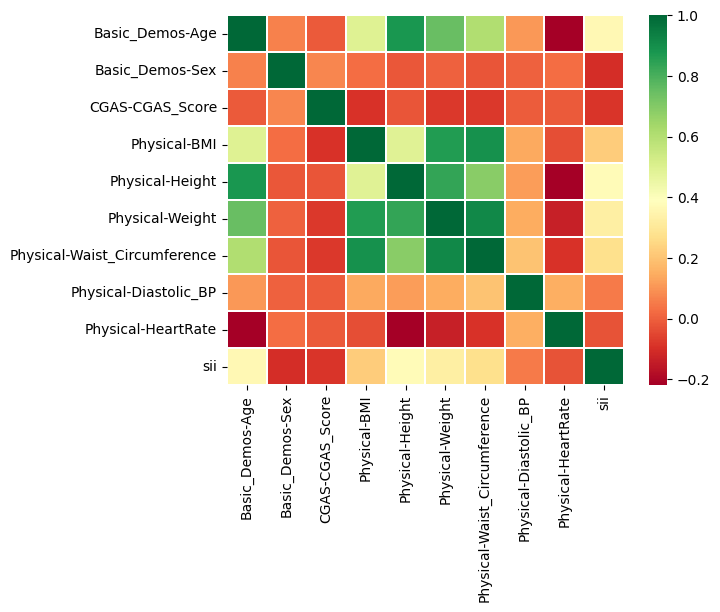

In [24]:
sns.heatmap(sub_dfs[0].corr(numeric_only = [True]), cmap ='RdYlGn', linewidths = 0.30)

<Axes: >

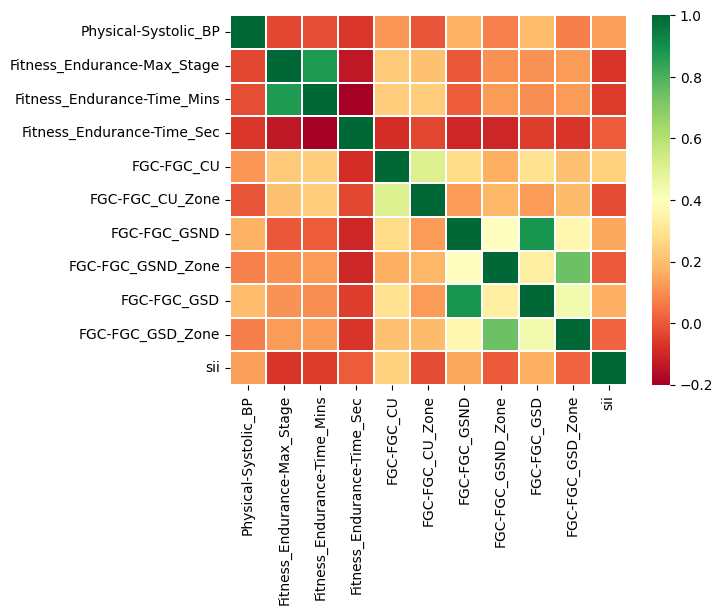

In [26]:
sns.heatmap(sub_dfs[1].corr(numeric_only = [True]), cmap ='RdYlGn', linewidths = 0.30)

<Axes: >

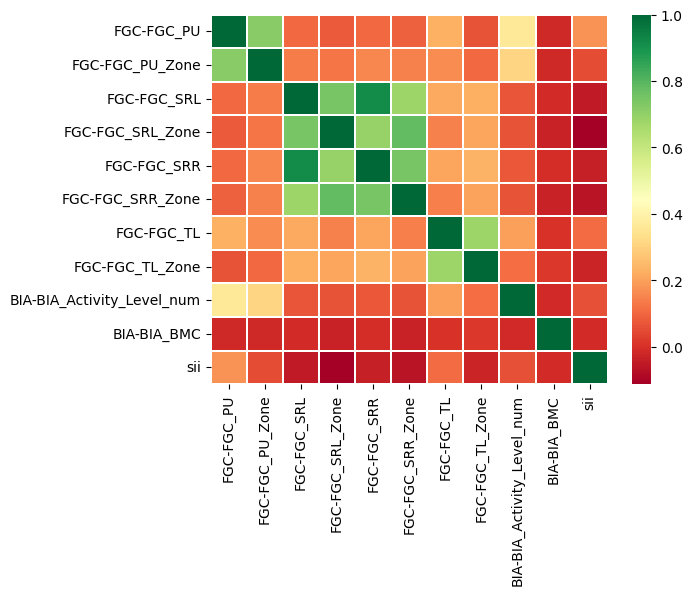

In [27]:
sns.heatmap(sub_dfs[2].corr(numeric_only = [True]), cmap ='RdYlGn', linewidths = 0.30)

<Axes: >

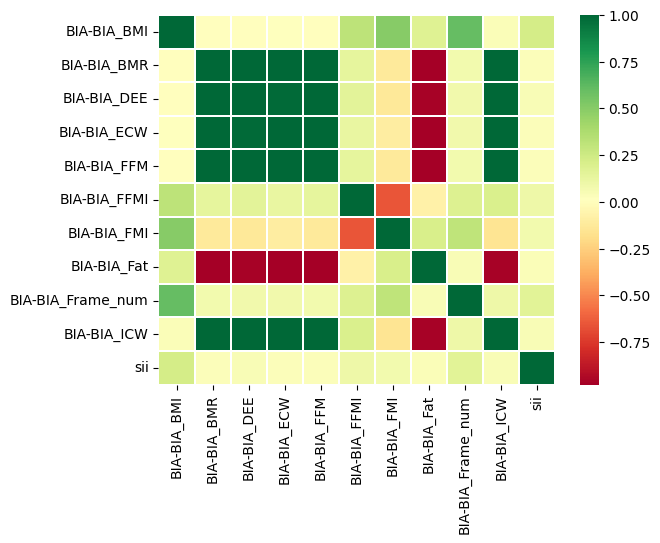

In [28]:
sns.heatmap(sub_dfs[3].corr(numeric_only = [True]), cmap ='RdYlGn', linewidths = 0.30)

<Axes: >

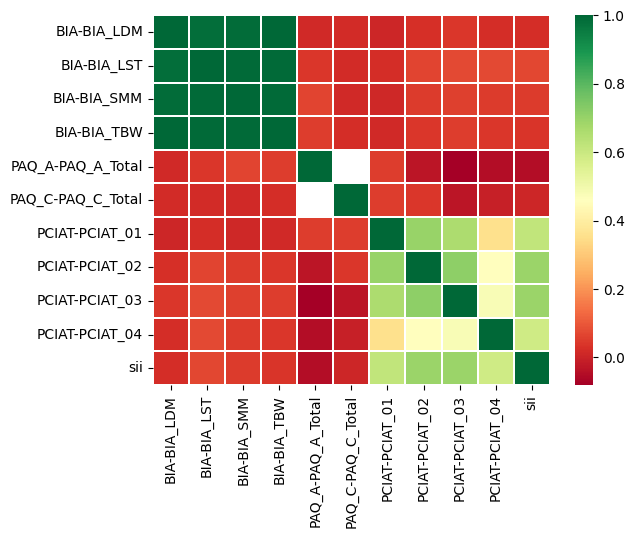

In [29]:
sns.heatmap(sub_dfs[4].corr(numeric_only = [True]), cmap ='RdYlGn', linewidths = 0.30)

<Axes: >

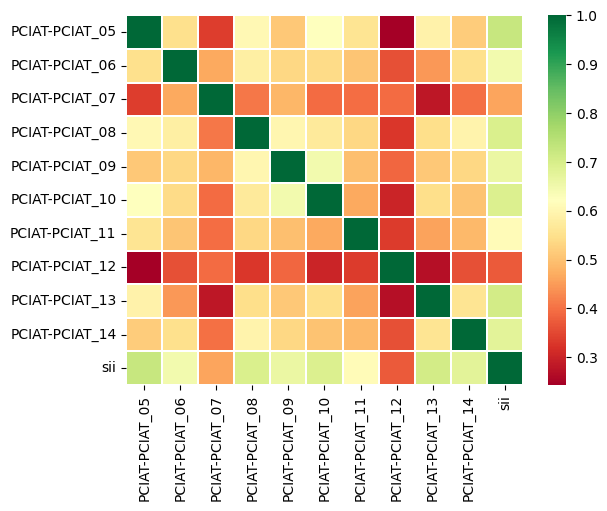

In [30]:
sns.heatmap(sub_dfs[5].corr(numeric_only = [True]), cmap ='RdYlGn', linewidths = 0.30)

<Axes: >

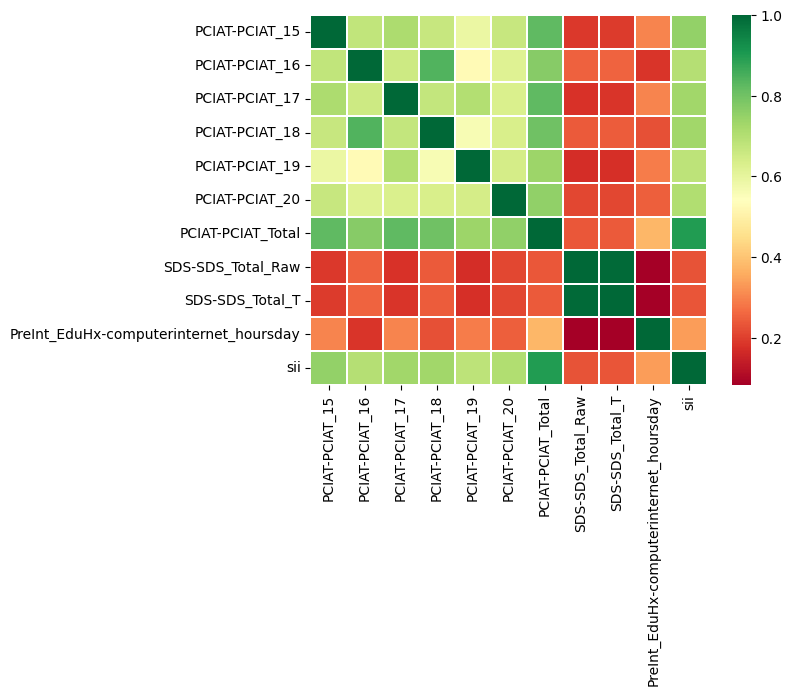

In [31]:
sns.heatmap(sub_dfs[6].corr(numeric_only = [True]), cmap ='RdYlGn', linewidths = 0.30)

<Axes: >

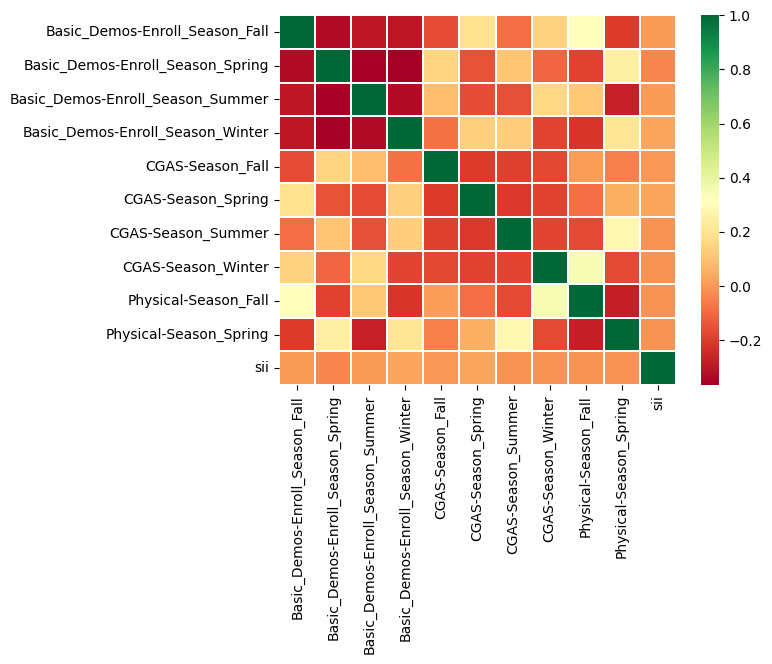

In [32]:
sns.heatmap(sub_dfs[7].corr(numeric_only = [True]), cmap ='RdYlGn', linewidths = 0.30)

<Axes: >

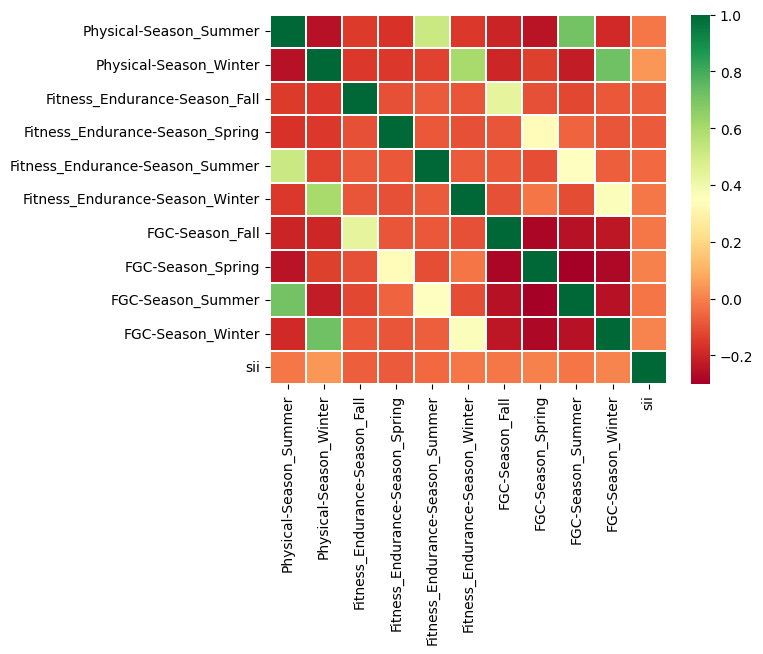

In [33]:
sns.heatmap(sub_dfs[8].corr(numeric_only = [True]), cmap ='RdYlGn', linewidths = 0.30)

<Axes: >

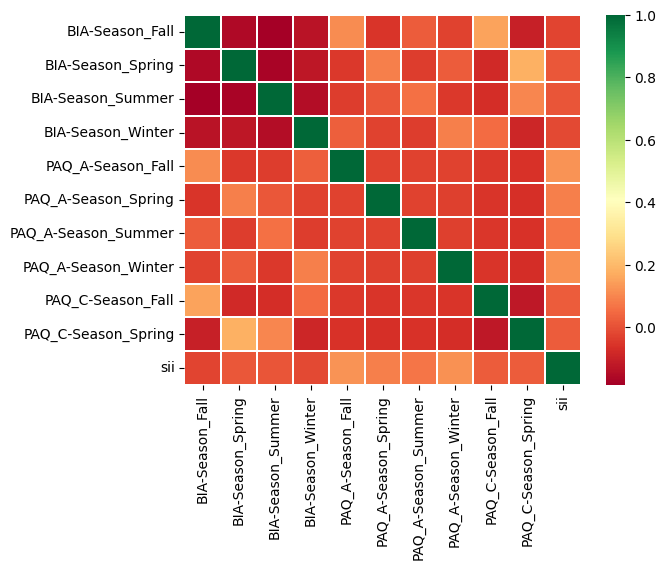

In [34]:
sns.heatmap(sub_dfs[9].corr(numeric_only = [True]), cmap ='RdYlGn', linewidths = 0.30)

<Axes: >

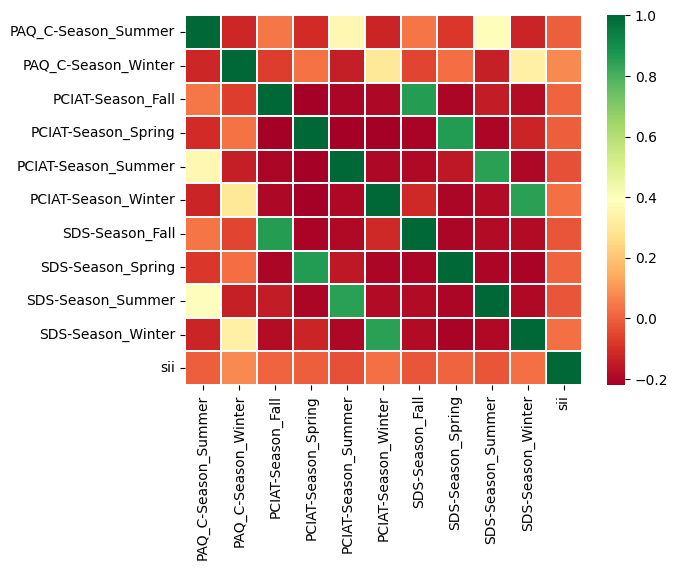

In [35]:
sns.heatmap(sub_dfs[10].corr(numeric_only = [True]), cmap ='RdYlGn', linewidths = 0.30)

<Axes: >

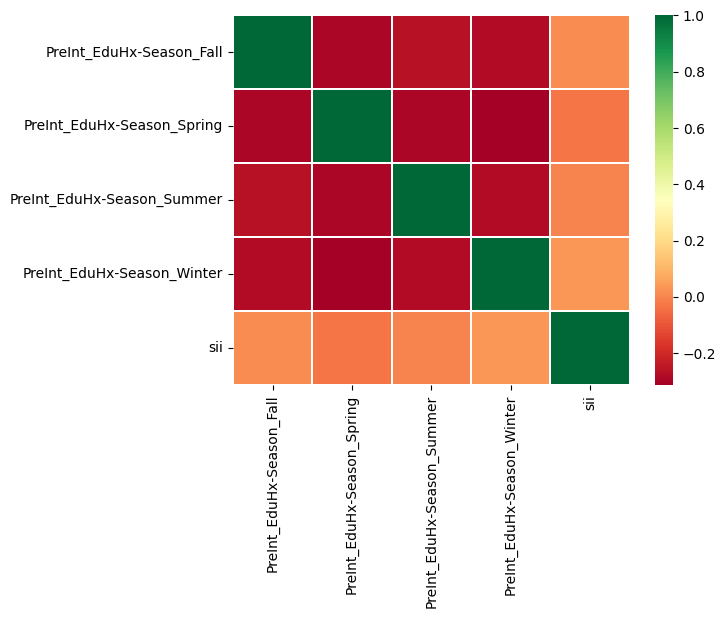

In [36]:
sns.heatmap(sub_dfs[11].corr(numeric_only = [True]), cmap ='RdYlGn', linewidths = 0.30)

In [ ]:
df.to_csv('data_proccessed.csv', index=False)

In [13]:
df_filtered = df[test_df.columns]

In [14]:
df_filtered.shape
df = df_filtered

In [15]:
df.shape

(3960, 58)

In [17]:
df.head(20)

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
id,,,,,,,,,,,,,,,,,,,,,
00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.00,50.8,NaN,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.00,46.0,22.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.50,75.6,NaN,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.00,81.6,NaN,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.50,112.2,NaN,...,63.1265,NaN,NaN,Spring,4.110,Summer,40.0,56.0,Spring,0.0
0038ba98,Fall,10,0,NaN,NaN,Fall,19.660760,55.00,84.6,NaN,...,47.2211,NaN,NaN,Winter,3.670,Winter,27.0,40.0,Fall,3.0
0068a485,Fall,10,1,NaN,NaN,Fall,16.861286,59.25,84.2,27.0,...,50.4767,NaN,NaN,Fall,1.270,NaN,NaN,NaN,Fall,2.0
0069fbed,Summer,15,0,NaN,NaN,Spring,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.0


In [21]:
missing_columns = df.columns.difference(test_df.columns)

In [22]:
print(missing_columns)

Index(['PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04',
       'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06', 'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08',
       'PCIAT-PCIAT_09', 'PCIAT-PCIAT_10', 'PCIAT-PCIAT_11', 'PCIAT-PCIAT_12',
       'PCIAT-PCIAT_13', 'PCIAT-PCIAT_14', 'PCIAT-PCIAT_15', 'PCIAT-PCIAT_16',
       'PCIAT-PCIAT_17', 'PCIAT-PCIAT_18', 'PCIAT-PCIAT_19', 'PCIAT-PCIAT_20',
       'PCIAT-PCIAT_Total', 'PCIAT-Season', 'sii'],
      dtype='object')
